# InstructPix2Pix: Learning to Follow Image Editing Instructions

A demo notebook for [InstructPix2Pix](https://www.timothybrooks.com/instruct-pix2pix/) using [diffusers](https://github.com/huggingface/diffusers). InstructPix2Pix is fine-tuned stable diffusion model which allows you to edit images using language instructions.

<img src='https://instruct-pix2pix.timothybrooks.com/teaser.jpg'/>

In [1]:
!pip install -qqq git+https://github.com/huggingface/diffusers.git gradio transformers accelerate safetensors
!pip install datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/

Download a small sample of images from DreamBooth's training dataset

In [2]:
from datasets import load_dataset
import PIL
from PIL import Image

#ds1 = load_dataset("google/dreambooth", "duck_toy")
#image1 = ds1['train']['image'][0]

batchsize = 5
item = ["duck_toy", "bear_plushie", "dog3", "teapot", "clock"]
images = []
for i in range(batchsize):
  img = load_dataset("google/dreambooth", item[i])['train']['image'][0]
  img_resized = img.resize((img.size[0]//2, img.size[1]//2), Image.Resampling.LANCZOS)
  images.append(img_resized)

prompts = ["make it a real duck",
           "give him a pink hat",
           "turn him into a Greek statue",
           "make it an oil painting",
           "move to the beach"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.36k [00:00<?, ?B/s]

00.jpg:   0%|          | 0.00/311k [00:00<?, ?B/s]

01.jpg:   0%|          | 0.00/383k [00:00<?, ?B/s]

02.jpg:   0%|          | 0.00/314k [00:00<?, ?B/s]

03.jpg:   0%|          | 0.00/478k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4 [00:00<?, ? examples/s]

00.jpg:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

01.jpg:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

02.jpg:   0%|          | 0.00/2.09M [00:00<?, ?B/s]

03.jpg:   0%|          | 0.00/1.81M [00:00<?, ?B/s]

04.jpg:   0%|          | 0.00/2.01M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5 [00:00<?, ? examples/s]

00.jpg:   0%|          | 0.00/223k [00:00<?, ?B/s]

01.jpg:   0%|          | 0.00/207k [00:00<?, ?B/s]

02.jpg:   0%|          | 0.00/333k [00:00<?, ?B/s]

03.jpg:   0%|          | 0.00/321k [00:00<?, ?B/s]

04.jpg:   0%|          | 0.00/260k [00:00<?, ?B/s]

05.jpg:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6 [00:00<?, ? examples/s]

00.jpg:   0%|          | 0.00/219k [00:00<?, ?B/s]

01.jpg:   0%|          | 0.00/162k [00:00<?, ?B/s]

02.jpg:   0%|          | 0.00/228k [00:00<?, ?B/s]

03.jpg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

04.jpg:   0%|          | 0.00/124k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5 [00:00<?, ? examples/s]

00.jpg:   0%|          | 0.00/471k [00:00<?, ?B/s]

01.jpg:   0%|          | 0.00/186k [00:00<?, ?B/s]

02.jpg:   0%|          | 0.00/140k [00:00<?, ?B/s]

03.jpg:   0%|          | 0.00/139k [00:00<?, ?B/s]

04.jpg:   0%|          | 0.00/289k [00:00<?, ?B/s]

05.jpg:   0%|          | 0.00/116k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6 [00:00<?, ? examples/s]

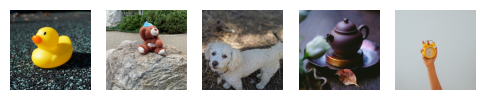

In [3]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(images), figsize=(6, len(images)))
for ax, img in zip(axes, images):
    ax.imshow(img)
    ax.axis('off')  # Hide axes
plt.show()

Load the `StableDiffusionInstructPix2PixPipeline` pipeline

In [8]:
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline

pipeline = StableDiffusionInstructPix2PixPipeline.from_pretrained("timbrooks/instruct-pix2pix", torch_dtype=torch.float16).to("cuda")
generator = torch.Generator("cuda").manual_seed(0)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [9]:
num_inference_steps = 20
image_guidance_scale = 1.5
guidance_scale = 10
output = []
for i in range(len(images)):
  output.append(pipeline(
      prompts[i],
      image=images[i],
      num_inference_steps=num_inference_steps,
      image_guidance_scale=image_guidance_scale,
      guidance_scale=guidance_scale,
      generator=generator,
      ).images[0])

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Combine images and prompts to generate output

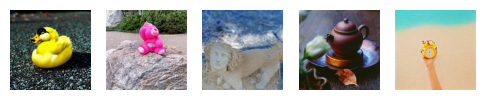

In [11]:
fig, axes = plt.subplots(1, len(output), figsize=(6, len(output)))
for ax, img in zip(axes, output):
    ax.imshow(img)
    ax.axis('off')  # Hide axes
plt.show()

In [ ]:
# DEPRECATED CODE
# ---------------

#import requests
#import torch
#from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

#model_id = "timbrooks/instruct-pix2pix"
#pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", safety_checker=None)
#pipe.to("cuda")
#pipe.enable_attention_slicing()

#output = []
#for i in range(len(images)):
#  output.append(pipe(prompts[i], image=images[i], num_inference=20, image_guidance_scale=1).images[0])
#  torch.cuda.empty_cache()
